**House Price Prediction with ANN**

#**The aim of this project is to predict House prices.**
The dataset used in this project was gotten from kaggle datasets. It is a publicly available dataset.
This project focuses on developing an artificial neural network to predict the price of houses.  

In [4]:
#importing relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set()


In [5]:
#importing the file
#this project was carried out in google collaboratory environment
#so i imported my drive, since the file is in my google drive
#from google.colab import drive
#drive.mount('/content/drive')
#file_path = '/content/drive/MyDrive/Housing.csv'

df = pd.read_csv('Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [6]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [7]:
#descriptive statistics of the data
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [8]:
#checking the information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


The dataset does not contain any missing data

In [9]:
#checking for the unique values present in the categorical columns
for c in df.columns:
  if df[c].dtype == 'object':
    print(f'{c} : {df[c].unique()}')

mainroad : ['yes' 'no']
guestroom : ['no' 'yes']
basement : ['no' 'yes']
hotwaterheating : ['no' 'yes']
airconditioning : ['yes' 'no']
prefarea : ['yes' 'no']
furnishingstatus : ['furnished' 'semi-furnished' 'unfurnished']


In [10]:
df.furnishingstatus.value_counts()

furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64

**Exploratory Analysis**

<Axes: xlabel='price', ylabel='Density'>

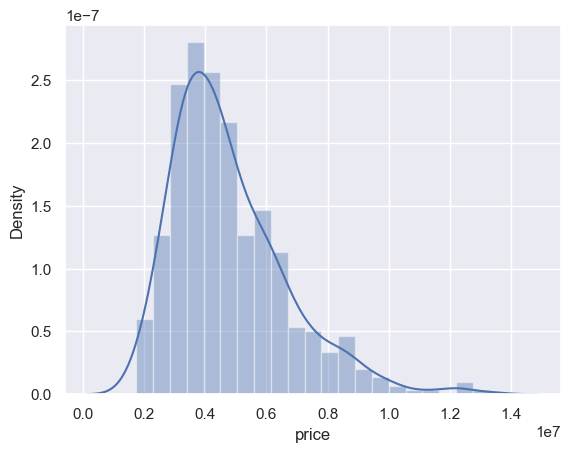

In [11]:
#checking the price distribution
sns.distplot(df['price'])

In [12]:
df.price.describe()

count    5.450000e+02
mean     4.766729e+06
std      1.870440e+06
min      1.750000e+06
25%      3.430000e+06
50%      4.340000e+06
75%      5.740000e+06
max      1.330000e+07
Name: price, dtype: float64

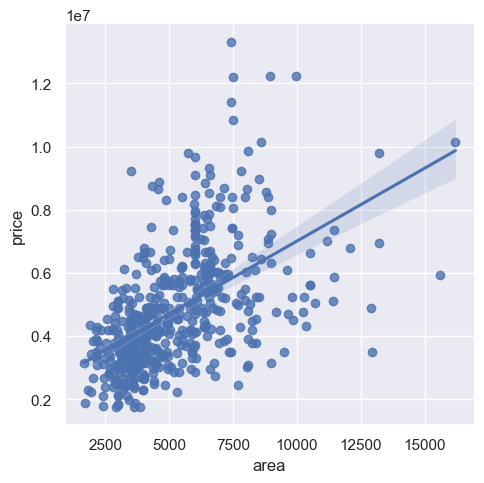

In [13]:
#scatter plot to display the relationship between price and area
sns.lmplot(x='area', y='price', data=df)

<Axes: ylabel='bedrooms'>

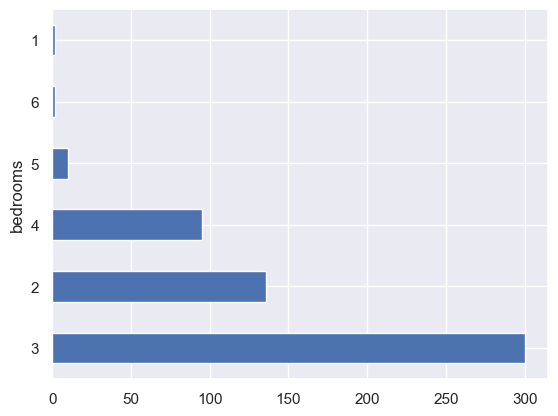

In [14]:
#displaying the number of bathrooms per house
df.bedrooms.value_counts().plot.barh()

<Axes: ylabel='stories'>

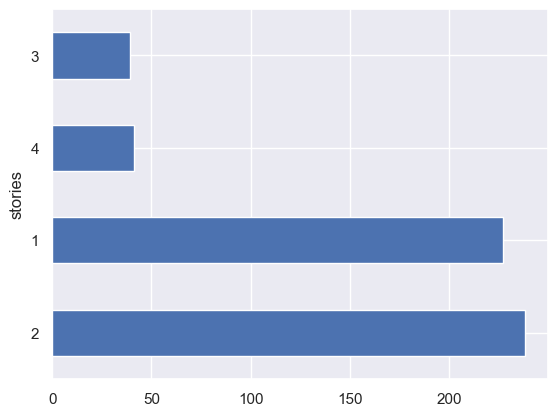

In [15]:
#displaying the number of story building per house
df.stories.value_counts().plot.barh()

<Axes: ylabel='bathrooms'>

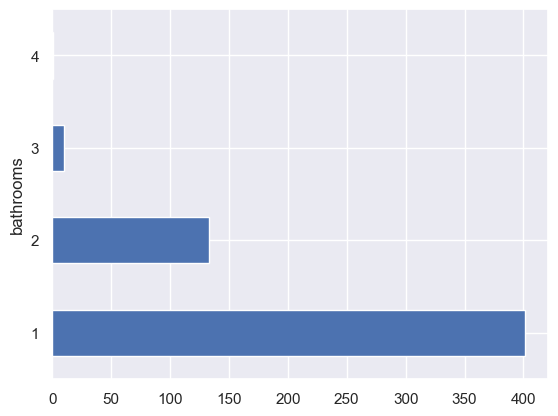

In [16]:
#displaying the number of bathrooms per house
df.bathrooms.value_counts().plot.barh()

**Feature Enginnering and Encoding**

In [17]:
df['area_per_bathroom'] = df['area']/df['bathrooms']
df['area_per_bedrooms'] = df['area']/df['bedrooms']
df['area_per_stories'] = df['area']/df['stories']
df['bathrooms_per_bedrooms'] = df['bathrooms']/df['bedrooms']
df['stories_per_bedrooms'] = df['stories']/df['bedrooms']
df['area_times_bedrooms'] = df['area']*df['bedrooms']
df['bathroom_times_stories'] = df['bathrooms']*df['stories']
df['area_times_stories'] = df['area']*df['stories']


In [18]:
#since a number of categorical columns have Yes and No values, I have decided to assign 1 to 'yes' and 0 to 'no'
df.replace({
    'yes': 1,
    'no': 0
},inplace = True)

In [19]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,...,prefarea,furnishingstatus,area_per_bathroom,area_per_bedrooms,area_per_stories,bathrooms_per_bedrooms,stories_per_bedrooms,area_times_bedrooms,bathroom_times_stories,area_times_stories
0,13300000,7420,4,2,3,1,0,0,0,1,...,1,furnished,3710.0,1855.0,2473.333333,0.500000,0.750000,29680,6,22260
1,12250000,8960,4,4,4,1,0,0,0,1,...,0,furnished,2240.0,2240.0,2240.000000,1.000000,1.000000,35840,16,35840
2,12250000,9960,3,2,2,1,0,1,0,0,...,1,semi-furnished,4980.0,3320.0,4980.000000,0.666667,0.666667,29880,4,19920
3,12215000,7500,4,2,2,1,0,1,0,1,...,1,furnished,3750.0,1875.0,3750.000000,0.500000,0.500000,30000,4,15000
4,11410000,7420,4,1,2,1,1,1,0,1,...,0,furnished,7420.0,1855.0,3710.000000,0.250000,0.500000,29680,2,14840


In [20]:
from sklearn.preprocessing import OneHotEncoder


In [21]:
cat_val = []
#creating a list for categorical columns
for c in df.columns:
    if df[c].dtype == 'object':
        cat_val.append(c)

In [22]:
cat_val

['furnishingstatus']

In [23]:
#encoding the categorical feature
ohe = OneHotEncoder(drop = 'first')
ohe_transformed = ohe.fit_transform(df[cat_val])
dense_df = ohe_transformed.todense() #the matrix is turned dense
df_todense = pd.DataFrame(dense_df, columns = ohe.get_feature_names_out()) #the densed data is turned into a dataframe

df = pd.concat([df, df_todense], axis = 1)
df.drop(cat_val, axis = 1, inplace = True)

In [24]:
import pickle
pickle.dump(ohe, open('encoder.pkl','wb'))

In [25]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,...,area_per_bathroom,area_per_bedrooms,area_per_stories,bathrooms_per_bedrooms,stories_per_bedrooms,area_times_bedrooms,bathroom_times_stories,area_times_stories,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,...,3710.0,1855.0,2473.333333,0.500000,0.750000,29680,6,22260,0.0,0.0
1,12250000,8960,4,4,4,1,0,0,0,1,...,2240.0,2240.0,2240.000000,1.000000,1.000000,35840,16,35840,0.0,0.0
2,12250000,9960,3,2,2,1,0,1,0,0,...,4980.0,3320.0,4980.000000,0.666667,0.666667,29880,4,19920,1.0,0.0
3,12215000,7500,4,2,2,1,0,1,0,1,...,3750.0,1875.0,3750.000000,0.500000,0.500000,30000,4,15000,0.0,0.0
4,11410000,7420,4,1,2,1,1,1,0,1,...,7420.0,1855.0,3710.000000,0.250000,0.500000,29680,2,14840,0.0,0.0


In [26]:
df1 = df.copy()

In [27]:
#the house price values are large and this confuses the algorithm, so i decided to take the logarithmic value of the house price
df1['log_price'] = np.log(df1['price'])

#standardizing the data
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
x = df1.drop(['log_price', 'price'], axis = 1)
y = df1['log_price']

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled = pd.DataFrame(x_scaled, columns = x.columns)
x_scaled.head()


,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,...,area_per_bathroom,area_per_bedrooms,area_per_stories,bathrooms_per_bedrooms,stories_per_bedrooms,area_times_bedrooms,bathroom_times_stories,area_times_stories,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,1.046726,1.403419,1.421812,1.378217,0.405623,-0.465315,-0.734539,-0.219265,1.472618,1.517692,...,-0.307059,0.041926,-0.453554,0.336622,0.520671,1.704315,1.834052,1.908066,-0.844888,-0.696429
1,1.757010,1.403419,5.405809,2.532024,0.405623,-0.465315,-0.734539,-0.219265,1.472618,2.679409,...,-1.000323,0.501177,-0.557532,3.474461,1.472905,2.445470,7.021175,3.931957,-0.844888,-0.696429
2,2.218232,0.047278,1.421812,0.224410,0.405623,-0.465315,1.361397,-0.219265,-0.679063,1.517692,...,0.291884,1.789465,0.663464,1.382568,0.203260,1.728378,0.796628,1.559325,1.183588,-0.696429
3,1.083624,1.403419,1.421812,0.224410,0.405623,-0.465315,1.361397,-0.219265,1.472618,2.679409,...,-0.288194,0.065783,0.115353,0.336622,-0.431563,1.742816,0.796628,0.826075,-0.844888,-0.696429
4,1.046726,1.403419,-0.570187,0.224410,0.405623,2.149083,1.361397,-0.219265,1.472618,1.517692,...,1.442608,0.041926,0.097528,-1.232297,-0.431563,1.704315,-0.240797,0.802229,-0.844888,-0.696429


In [28]:
pickle.dump(scaler,open('scal.pkl','wb'))

In [29]:
#splitting the data into test and train sets
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.2, random_state = 42)
X_train.shape, X_test.shape


((436, 21), (109, 21))

In [30]:
x_scaled.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,...,area_per_bathroom,area_per_bedrooms,area_per_stories,bathrooms_per_bedrooms,stories_per_bedrooms,area_times_bedrooms,bathroom_times_stories,area_times_stories,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,1.046726,1.403419,1.421812,1.378217,0.405623,-0.465315,-0.734539,-0.219265,1.472618,1.517692,...,-0.307059,0.041926,-0.453554,0.336622,0.520671,1.704315,1.834052,1.908066,-0.844888,-0.696429
1,1.757010,1.403419,5.405809,2.532024,0.405623,-0.465315,-0.734539,-0.219265,1.472618,2.679409,...,-1.000323,0.501177,-0.557532,3.474461,1.472905,2.445470,7.021175,3.931957,-0.844888,-0.696429
2,2.218232,0.047278,1.421812,0.224410,0.405623,-0.465315,1.361397,-0.219265,-0.679063,1.517692,...,0.291884,1.789465,0.663464,1.382568,0.203260,1.728378,0.796628,1.559325,1.183588,-0.696429
3,1.083624,1.403419,1.421812,0.224410,0.405623,-0.465315,1.361397,-0.219265,1.472618,2.679409,...,-0.288194,0.065783,0.115353,0.336622,-0.431563,1.742816,0.796628,0.826075,-0.844888,-0.696429
4,1.046726,1.403419,-0.570187,0.224410,0.405623,2.149083,1.361397,-0.219265,1.472618,1.517692,...,1.442608,0.041926,0.097528,-1.232297,-0.431563,1.704315,-0.240797,0.802229,-0.844888,-0.696429


#### Model Architecture
This is the artificial neural network structure. In this network, there are 4 hidden layers and each hidden layer has its own activation function.
The first hidden layer uses RELU as activation fumction, the second uses TANH, the third too and the last hidden layer makes use of RELU activation function.
The output layer does not need an activation function. The optimizer used is ADAM and loss function is Mean_squared error.

#### Model Training

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten

model = Sequential(
    [
        Flatten(input_shape=(X_train.shape[1],)),
        Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        Dropout(0.2),
        Dense(32, activation='tanh'),
        Dropout(0.2),
        Dense(16, activation='tanh'),
        Dense(8, activation = 'relu'),
        #Dropout(0.2),
        Dense(4, activation = 'relu'),
        #Dropout(0.2),
        #Dense(2, activation = 'tanh'),
        Dense(1),

    ]
)

model.compile(optimizer='adam', loss='mean_squared_error')
#history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

#fitting the model
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)



Epoch 1/50

14/14 [==============================] - 5s 6ms/step - loss: 218.0278
Epoch 2/50
14/14 [==============================] - 0s 5ms/step - loss: 189.8060
Epoch 3/50
14/14 [==============================] - 0s 5ms/step - loss: 150.9744
Epoch 4/50
14/14 [==============================] - 0s 5ms/step - loss: 109.3222
Epoch 5/50
14/14 [==============================] - 0s 5ms/step - loss: 74.1964
Epoch 6/50
14/14 [==============================] - 0s 4ms/step - loss: 47.1086
Epoch 7/50
14/14 [==============================] - 0s 4ms/step - loss: 26.9567
Epoch 8/50
14/14 [==============================] - 0s 5ms/step - loss: 13.4467
Epoch 9/50
14/14 [==============================] - 0s 5ms/step - loss: 5.6106
Epoch 10/50
14/14 [==============================] - 0s 4ms/step - loss: 2.0489
Epoch 11/50
14/14 [==============================] - 0s 4ms/step - loss: 0.6268
Epoch 12/50
14/14 [==============================] - 0s 5ms/step - loss: 0.2463
Epoch 13/50
14/14 [===============

In [32]:
#evaluating the model on the test sets
model.evaluate(X_test, y_test)
#print(f'Test loss: {loss:.4f}')

4/4 [==============================] - 1s 6ms/step - loss: 0.1819


0.18193121254444122

In [33]:
#making predictions on the test data
y_preds = model.predict(X_test)

4/4 [==============================] - 0s 3ms/step


In [34]:
#comparing the test results and the predictions
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_preds.flatten()})
results['Difference'] = results['Actual'] - results['Predicted']
results.head(20)

,Actual,Predicted,Difference
316,15.216694,15.375769,-0.159075
77,15.710127,15.434853,0.275275
360,15.126542,15.398402,-0.271860
90,15.678039,15.372938,0.305101
493,14.845130,15.378838,-0.533708
209,15.404746,15.398542,0.006203
176,15.473739,15.443861,0.029878
249,15.329098,15.415882,-0.086784
516,14.711599,15.377419,-0.665820
426,15.025366,15.395309,-0.369943


In [35]:
#taking the exponential value of the predictions and actual prices and comparing them
results['actual_price'] = np.exp(results['Actual'])
results['predicted_price'] = np.exp(results['Predicted'])
results['actual_difference'] = np.exp(results['Difference'])
results.head()
#pd.options.display.float_format = '{:.0f}'.format
results.head(20)

,Actual,Predicted,Difference,actual_price,predicted_price,actual_difference
316,15.216694,15.375769,-0.159075,4060000.0,4760049.5,0.852932
77,15.710127,15.434853,0.275275,6650000.0,5049767.0,1.316893
360,15.126542,15.398402,-0.271860,3710000.0,4869015.0,0.761961
90,15.678039,15.372938,0.305101,6440000.0,4746595.5,1.356762
493,14.845130,15.378838,-0.533708,2800000.0,4774680.5,0.586427
209,15.404746,15.398542,0.006203,4900000.0,4869697.5,1.006223
176,15.473739,15.443861,0.029878,5250000.0,5095462.5,1.030328
249,15.329098,15.415882,-0.086784,4543000.0,4954873.5,0.916875
516,14.711599,15.377419,-0.665820,2450000.0,4767909.5,0.513852
426,15.025366,15.395309,-0.369943,3353000.0,4853979.5,0.690773


In [36]:
pickle.dump(model, open('model.pkl','wb'))

In [37]:
df.parking.value_counts()

parking
0    299
1    126
2    108
3     12
Name: count, dtype: int64

In [38]:
results

,Actual,Predicted,Difference,actual_price,predicted_price,actual_difference
316,15.216694,15.375769,-0.159075,4060000.0,4760049.5,0.852932
77,15.710127,15.434853,0.275275,6650000.0,5049767.0,1.316893
360,15.126542,15.398402,-0.271860,3710000.0,4869015.0,0.761961
90,15.678039,15.372938,0.305101,6440000.0,4746595.5,1.356762
493,14.845130,15.378838,-0.533708,2800000.0,4774680.5,0.586427
...,...,...,...,...,...,...
15,16.023785,15.392900,0.630885,9100000.0,4842300.5,1.879272
357,15.143381,15.366783,-0.223402,3773000.0,4717470.0,0.799793
39,15.883638,15.448969,0.434669,7910000.0,5121556.0,1.544452
54,15.810211,15.436455,0.373756,7350000.0,5057863.5,1.453183


In [39]:
results.tail(20)

,Actual,Predicted,Difference,actual_price,predicted_price,actual_difference
11,16.085676,15.455791,0.629885,9681000.0,5156613.0,1.877395
271,15.283385,15.428117,-0.144732,4340000.0,5015866.5,0.865254
22,15.972492,15.423374,0.549118,8645000.0,4992135.0,1.731724
365,15.124654,15.344437,-0.219783,3703000.0,4613220.0,0.802693
182,15.453536,15.363211,0.090325,5145000.0,4700647.0,1.094530
89,15.678039,15.440741,0.237299,6440000.0,5079587.5,1.267820
117,15.598902,15.410091,0.188810,5950000.0,4926264.0,1.207812
131,15.575091,15.442001,0.133090,5810000.0,5085996.0,1.142353
140,15.562970,15.451120,0.111849,5740000.0,5132587.5,1.118344
101,15.644887,15.390656,0.254231,6230000.0,4831442.0,1.289470


In [40]:
np.exp(15.4)

4876800.853272269

In [41]:
np.exp(14.5456)

2075266.215408412

In [42]:
0*0

0

In [43]:
pd.options.display.float_format = '{:.3f}'.format

In [44]:
df1

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,...,area_per_bedrooms,area_per_stories,bathrooms_per_bedrooms,stories_per_bedrooms,area_times_bedrooms,bathroom_times_stories,area_times_stories,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,log_price
0,13300000,7420,4,2,3,1,0,0,0,1,...,1855.000,2473.333,0.500,0.750,29680,6,22260,0.000,0.000,16.403
1,12250000,8960,4,4,4,1,0,0,0,1,...,2240.000,2240.000,1.000,1.000,35840,16,35840,0.000,0.000,16.321
2,12250000,9960,3,2,2,1,0,1,0,0,...,3320.000,4980.000,0.667,0.667,29880,4,19920,1.000,0.000,16.321
3,12215000,7500,4,2,2,1,0,1,0,1,...,1875.000,3750.000,0.500,0.500,30000,4,15000,0.000,0.000,16.318
4,11410000,7420,4,1,2,1,1,1,0,1,...,1855.000,3710.000,0.250,0.500,29680,2,14840,0.000,0.000,16.250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,...,1500.000,3000.000,0.500,0.500,6000,1,3000,0.000,1.000,14.414
541,1767150,2400,3,1,1,0,0,0,0,0,...,800.000,2400.000,0.333,0.333,7200,1,2400,1.000,0.000,14.385
542,1750000,3620,2,1,1,1,0,0,0,0,...,1810.000,3620.000,0.500,0.500,7240,1,3620,0.000,1.000,14.375
543,1750000,2910,3,1,1,0,0,0,0,0,...,970.000,2910.000,0.333,0.333,8730,1,2910,0.000,0.000,14.375


In [45]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,...,area_per_bathroom,area_per_bedrooms,area_per_stories,bathrooms_per_bedrooms,stories_per_bedrooms,area_times_bedrooms,bathroom_times_stories,area_times_stories,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,...,3710.000,1855.000,2473.333,0.500,0.750,29680,6,22260,0.000,0.000
1,12250000,8960,4,4,4,1,0,0,0,1,...,2240.000,2240.000,2240.000,1.000,1.000,35840,16,35840,0.000,0.000
2,12250000,9960,3,2,2,1,0,1,0,0,...,4980.000,3320.000,4980.000,0.667,0.667,29880,4,19920,1.000,0.000
3,12215000,7500,4,2,2,1,0,1,0,1,...,3750.000,1875.000,3750.000,0.500,0.500,30000,4,15000,0.000,0.000
4,11410000,7420,4,1,2,1,1,1,0,1,...,7420.000,1855.000,3710.000,0.250,0.500,29680,2,14840,0.000,0.000


In [46]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'area_per_bathroom', 'area_per_bedrooms',
       'area_per_stories', 'bathrooms_per_bedrooms', 'stories_per_bedrooms',
       'area_times_bedrooms', 'bathroom_times_stories', 'area_times_stories',
       'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished'],
      dtype='object')

In [47]:
pred_data = pd.DataFrame({
    'area':[12333],
    'bedrooms':[4],
    'bathrooms':[2],
    'stories':[1],
    'mainroad':['yes'],
    'guestroom':['no'],
    'basement':['no'],
    'hotwaterheating':['yes'],
    'airconditioning':['no'],
    'parking':[0],
    'prefarea':['yes'],
    'furnishingstatus':['unfurnished']
})

In [48]:
pred_data

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,12333,4,2,1,yes,no,no,yes,no,0,yes,unfurnished


In [49]:
pred_data.replace({
    'yes':1,
    'no':0
},inplace = True)

In [50]:
pred_data

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,12333,4,2,1,1,0,0,1,0,0,1,unfurnished


In [51]:
pred_prep = pred_data.copy()

In [52]:
scaler = pickle.load(open('scal.pkl','rb'))
encoder = pickle.load(open('encoder.pkl','rb'))
model = pickle.load(open('model.pkl','rb'))

In [53]:
pred_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   area              1 non-null      int64 
 1   bedrooms          1 non-null      int64 
 2   bathrooms         1 non-null      int64 
 3   stories           1 non-null      int64 
 4   mainroad          1 non-null      int64 
 5   guestroom         1 non-null      int64 
 6   basement          1 non-null      int64 
 7   hotwaterheating   1 non-null      int64 
 8   airconditioning   1 non-null      int64 
 9   parking           1 non-null      int64 
 10  prefarea          1 non-null      int64 
 11  furnishingstatus  1 non-null      object
dtypes: int64(11), object(1)
memory usage: 228.0+ bytes


In [54]:
pred_prep.columns

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
       'furnishingstatus'],
      dtype='object')

In [55]:
cat_col = []
for c in pred_prep.columns:
    if pred_prep[c].dtype == 'object':
        cat_col.append(c)

In [56]:
cat_col

['furnishingstatus']

In [57]:
pred_prep['area_per_bathroom'] = pred_prep['area']/pred_prep['bathrooms']
pred_prep['area_per_bedrooms'] = pred_prep['area']/pred_prep['bedrooms']
pred_prep['area_per_stories'] = pred_prep['area']/pred_prep['stories']
pred_prep['bathrooms_per_bedrooms'] = pred_prep['bathrooms']/pred_prep['bedrooms']
pred_prep['stories_per_bedrooms'] = pred_prep['stories']/pred_prep['bedrooms']
pred_prep['area_times_bedrooms'] = pred_prep['area']*pred_prep['bedrooms']
pred_prep['bathroom_times_stories'] = pred_prep['bathrooms']*pred_prep['stories']
pred_prep['area_times_stories'] = pred_prep['area']*pred_prep['stories']

In [58]:
enc_data =pd.DataFrame(encoder.transform(pred_prep[cat_col]))#.toarray())
    #enc_data.columns = encoder.get_feature_names_out()
enc_data.columns = encoder.get_feature_names_out(cat_col)
pred_prep = pred_prep.join(enc_data)
pred_prep

ValueError: Length mismatch: Expected axis has 1 elements, new values have 2 elements

In [ ]:
pred_prep.drop(['furnishingstatus'],
    axis=1,
    inplace = True)

In [ ]:
pred_prep

In [ ]:
pred_prep

In [ ]:
scaled_data = scaler.transform(pred_prep)
scaled_data = pd.DataFrame(scaled_data, columns = pred_prep.columns)
scaled_data

In [59]:
my_pred = model.predict(scaled_data)
my_pred

NameError: name 'scaled_data' is not defined

In [60]:
np.exp(my_pred)

NameError: name 'my_pred' is not defined